In [26]:
from svgpathtools import svg2paths, Path, Line, CubicBezier, QuadraticBezier, Arc
import numpy as np
import csv
from collections import defaultdict
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def extract_points_from_path(path_segment, num_samples=100):
    if isinstance(path_segment, (Line, CubicBezier, QuadraticBezier, Arc)):
        return [path_segment.point(t) for t in np.linspace(0, 1, num_samples)]
    return []

In [28]:
svg_file = './data/problems/isolated.svg' 
paths, _ = svg2paths(svg_file)

all_points = []
for curve_index, path in enumerate(paths):
    for segment in path:
        points = extract_points_from_path(segment)
        all_points.extend([(curve_index, 0.0000, float(p.real), float(p.imag)) for p in points])

with open('out.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['index', 'constant', 'x', 'y'])
    for index, constant, x, y in all_points:
        writer.writerow([index, constant, np.float64(x), np.float64(y)])

In [29]:
curves = defaultdict(list)
with open('out.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  
    for row in reader:
        try:
            curve_no = int(float(row[0])) 
            x = float(row[2])
            y = float(row[3])
            curves[curve_no].append((x, y))
        except ValueError as e:
            print(f"Skipping line due to error: {e}")

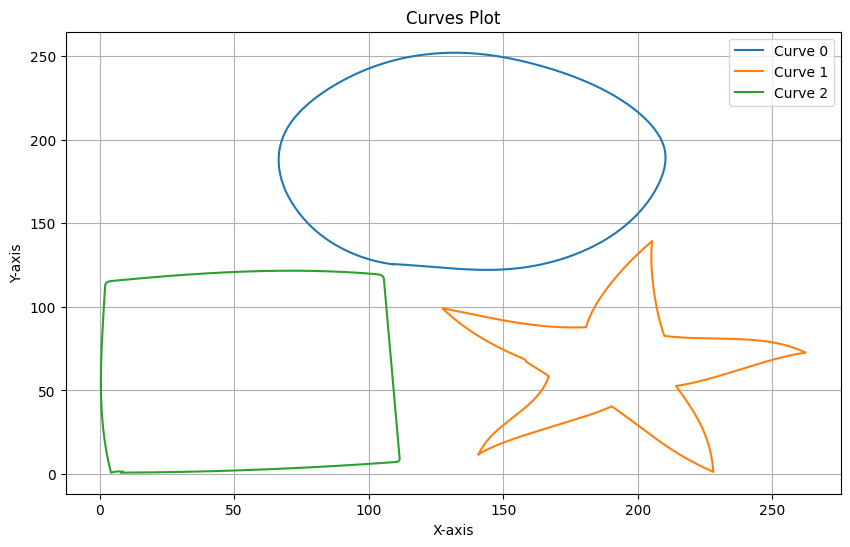

In [30]:
plt.figure(figsize=(10, 6))

for index, points in curves.items():
    x_values, y_values = zip(*points)  # Unpack the list of tuples into two lists: x_values and y_values
    plt.plot(x_values, y_values, label=f'Curve {index}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Curves Plot')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
curves
print(len(curves))

3


In [32]:
import math

def point_line_distance(point, start, end):
    """Calculate the perpendicular distance from a point to a line."""
    if start == end:
        return math.dist(point, start)
    else:
        n = abs((end[1] - start[1]) * point[0] - (end[0] - start[0]) * point[1] + end[0] * start[1] - end[1] * start[0])
        d = math.sqrt((end[1] - start[1]) ** 2 + (end[0] - start[0]) ** 2)
        return n / d

def ramer_douglas_peucker(points, epsilon):
    """Simplify a curve with the Ramer-Douglas-Peucker algorithm."""
    # Find the point with the maximum distance
    dmax = 0.0
    index = 0
    end = len(points)
    for i in range(1, end - 1):
        d = point_line_distance(points[i], points[0], points[-1])
        if d > dmax:
            index = i
            dmax = d
    
    # If max distance is greater than epsilon, recursively simplify
    if dmax > epsilon:
        # Recursive call
        rec_results1 = ramer_douglas_peucker(points[:index+1], epsilon)
        rec_results2 = ramer_douglas_peucker(points[index:], epsilon)
        
        # Build the result list
        result = rec_results1[:-1] + rec_results2
    else:
        result = [points[0], points[-1]]
    
    return result

def simplify_curves(curves, epsilon):
    """Simplify all curves in a dictionary using the Ramer-Douglas-Peucker algorithm."""
    simplified_curves = {}
    inverse_dict = {}
    
    for index, points in curves.items():
        simplified_points = ramer_douglas_peucker(points, epsilon)
        simplified_curves[index] = simplified_points
        
        # Create unique keys for line segments
        for i in range(len(simplified_points) - 1):
            start_point = tuple(simplified_points[i])
            end_point = tuple(simplified_points[i + 1])
            line_key = (start_point, end_point)
            inverse_dict[line_key] = index
    
    return simplified_curves, inverse_dict

epsilon = 1.5
simplified_curves, inverse_dict = simplify_curves(curves, epsilon)
print("Simplified Curves:", simplified_curves)
print("Inverse Dictionary:", inverse_dict)


Simplified Curves: {0: [(109.143, 125.58), (151.80736451959646, 122.55054452184332), (166.73501852006444, 126.35413222419068), (180.5189094650206, 133.95085459533607), (193.86279854972537, 146.7205239271606), (203.88246285217232, 163.17955963574116), (209.72914951989026, 182.1110205761317), (209.28984829624682, 197.7916479415108), (201.81290550541635, 213.96997841799276), (187.9821508617446, 229.22623794211881), (169.39986136850578, 241.53546461863806), (147.98669646882038, 249.8972734785875), (130.94848855558956, 252.00983938353016), (114.37003975784786, 249.28551235237805), (98.71983915473476, 241.73047222557165), (84.42494590533431, 229.7097896318557), (74.54185048835457, 216.88908339594283), (68.61187851270586, 203.27969065617913), (66.5561111111111, 188.29177777777772), (68.48928848014889, 171.96764307290843), (74.82899201071008, 154.74177062328212), (84.00408636513072, 140.90092152625112), (95.6809564433231, 130.87774329768448), (109.00399999999992, 125.43399999999994)], 1: [(140

In [33]:
import math

def distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def midpoint(point1, point2):
    """Calculate the midpoint between two points."""
    return ((point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2)

def round_point(point):
    """Round the coordinates of a point to one decimal place."""
    return (round(point[0], 1), round(point[1], 1))

def update_endpoints_with_midpoints(curves, threshold=5.0):
    """Update endpoints with midpoints if they are very close to each other."""
    endpoints = {}
    updated_curves = {k: v[:] for k, v in curves.items()}  # Create a copy of the curves dictionary

    # Extract endpoints
    for key, points in curves.items():
        endpoints[key] = (points[0], points[-1])

    print(updated_curves)
    # Check and update close endpoints within the same curve
    for key, (start, end) in endpoints.items():
        print(start, end)
        if distance(start, end) < threshold:
            mid = midpoint(start, end)
            updated_curves[key][0] = mid
            updated_curves[key][-1] = mid

    # Find and update close endpoints between different curves
    for key1, (start1, end1) in endpoints.items():
        for key2, (start2, end2) in endpoints.items():
            if key1 < key2:
                if distance(start1, start2) < threshold:
                    mid = midpoint(start1, start2)
                    updated_curves[key1][0] = mid
                    updated_curves[key2][0] = mid
                if distance(start1, end2) < threshold:
                    mid = midpoint(start1, end2)
                    updated_curves[key1][0] = mid
                    updated_curves[key2][-1] = mid
                if distance(end1, start2) < threshold:
                    mid = midpoint(end1, start2)
                    updated_curves[key1][-1] = mid
                    updated_curves[key2][0] = mid
                if distance(end1, end2) < threshold:
                    mid = midpoint(end1, end2)
                    updated_curves[key1][-1] = mid
                    updated_curves[key2][-1] = mid

    # Round all point values in the resulting dictionary
    for key, points in updated_curves.items():
        updated_curves[key] = [round_point(point) for point in points]

    return updated_curves

def update_inverse_dict(curves, inverse_dict, threshold=1.0):
    """Update the inverse dictionary with the new curve endpoints."""
    new_inverse_dict = {}
    
    # Recreate the inverse dictionary based on updated curves
    for index, points in curves.items():
        for i in range(len(points) - 1):
            start_point = tuple(points[i])
            end_point = tuple(points[i + 1])
            line_key = (start_point, end_point)
            new_inverse_dict[line_key] = index
    
    return new_inverse_dict

# Example usage
epsilon = 1.5
simplified_curves, inverse_dict = simplify_curves(curves, epsilon)

threshold = 10.0
updated_curves = update_endpoints_with_midpoints(simplified_curves, threshold)
new_inverse_dict = update_inverse_dict(updated_curves, inverse_dict, threshold)

print("Updated Curves:", updated_curves)
print("New Inverse Dictionary:", new_inverse_dict)
inverse_dict = new_inverse_dict


{0: [(109.143, 125.58), (151.80736451959646, 122.55054452184332), (166.73501852006444, 126.35413222419068), (180.5189094650206, 133.95085459533607), (193.86279854972537, 146.7205239271606), (203.88246285217232, 163.17955963574116), (209.72914951989026, 182.1110205761317), (209.28984829624682, 197.7916479415108), (201.81290550541635, 213.96997841799276), (187.9821508617446, 229.22623794211881), (169.39986136850578, 241.53546461863806), (147.98669646882038, 249.8972734785875), (130.94848855558956, 252.00983938353016), (114.37003975784786, 249.28551235237805), (98.71983915473476, 241.73047222557165), (84.42494590533431, 229.7097896318557), (74.54185048835457, 216.88908339594283), (68.61187851270586, 203.27969065617913), (66.5561111111111, 188.29177777777772), (68.48928848014889, 171.96764307290843), (74.82899201071008, 154.74177062328212), (84.00408636513072, 140.90092152625112), (95.6809564433231, 130.87774329768448), (109.00399999999992, 125.43399999999994)], 1: [(140.843, 11.852), (190

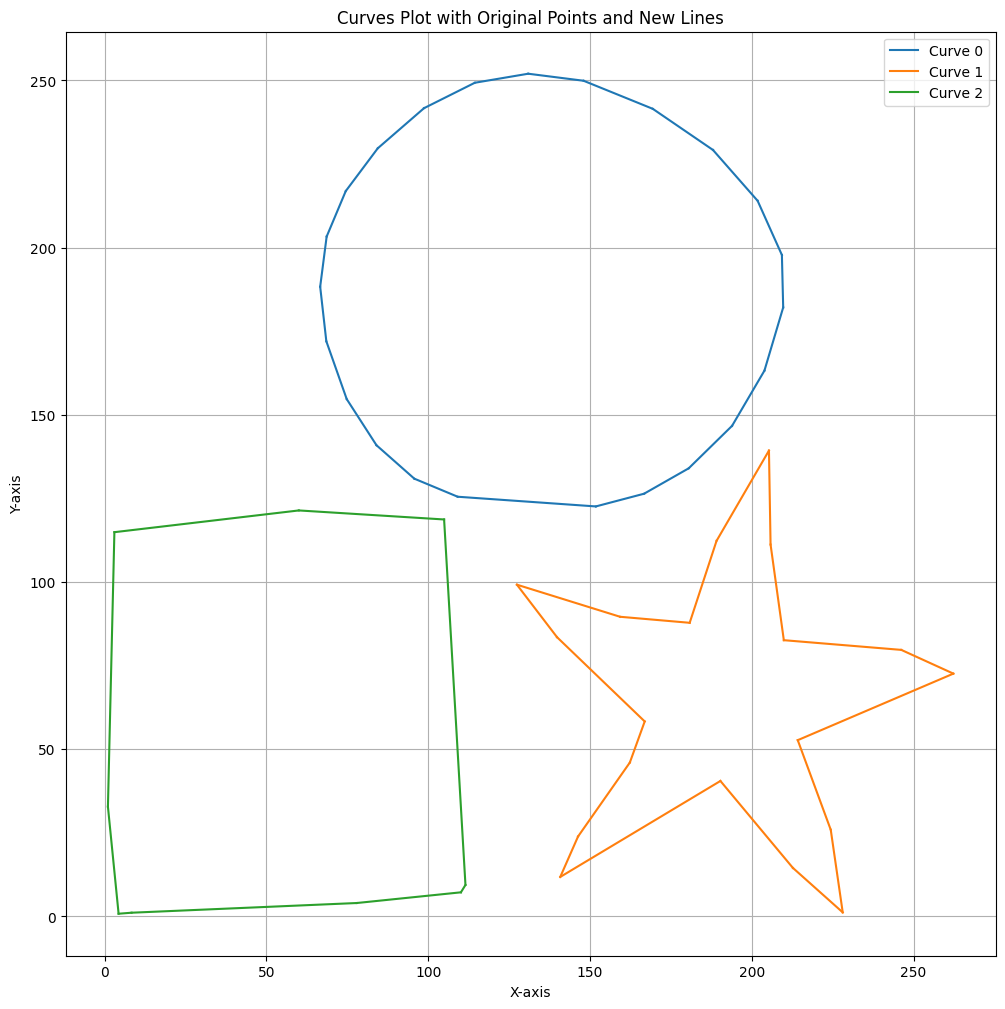

In [34]:
import matplotlib.pyplot as plt


curve_colors = {}
for line_key, curve_num in inverse_dict.items():
    if curve_num not in curve_colors:
        curve_colors[curve_num] = plt.cm.tab10(len(curve_colors))  

plt.figure(figsize=(12, 12))

for index, points in curves.items():
    x_values, y_values = zip(*points)  
    # plt.scatter(x_values, y_values, label=f'Original Points Curve {index}',linestyle='--')

for line_key, curve_num in inverse_dict.items():
    start, end = line_key
    color = curve_colors[curve_num]
    plt.plot([start[0], end[0]], [start[1], end[1]], color=color, label=f'Curve {curve_num}' if f'Curve {curve_num}' not in plt.gca().get_legend_handles_labels()[1] else "", linestyle='-')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Curves Plot with Original Points and New Lines')
plt.legend()
plt.grid(True)
plt.show()


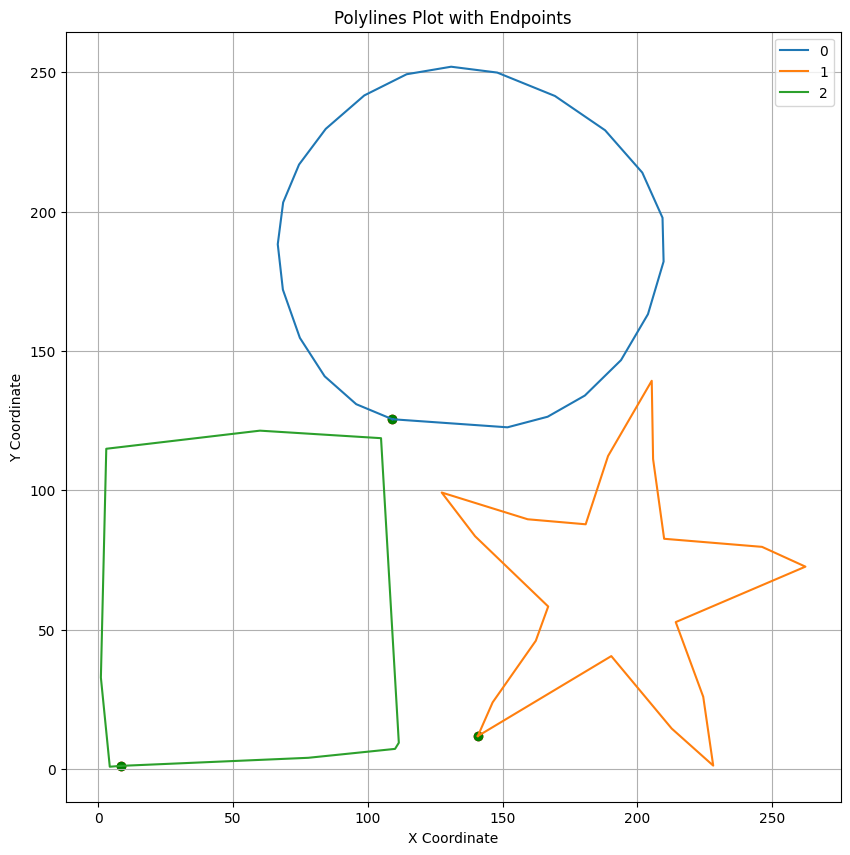

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for label, points in updated_curves.items():
    xs, ys = zip(*points)  # Unzip the list of points into x and y coordinates
    plt.plot(xs, ys, label=label)
    
    # Plot the endpoints
    plt.scatter(xs[0], ys[0], color='red')  # Start point
    plt.scatter(xs[-1], ys[-1], color='green')  # End point

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Polylines Plot with Endpoints')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
from collections import defaultdict

# Initialize adjacency list as a defaultdict of lists
adj_list = defaultdict(list)

# Given polylines


# Populate the adjacency list
for polyline in updated_curves.values():
    for i in range(len(polyline) - 1):
        start, end = polyline[i], polyline[i+1]
        adj_list[start].append(end)
        adj_list[end].append(start)

# Convert to a regular dictionary for a nicer display
adj_list = dict(adj_list)
adj_list

{(109.1, 125.5): [(151.8, 122.6), (95.7, 130.9)],
 (151.8, 122.6): [(109.1, 125.5), (166.7, 126.4)],
 (166.7, 126.4): [(151.8, 122.6), (180.5, 134.0)],
 (180.5, 134.0): [(166.7, 126.4), (193.9, 146.7)],
 (193.9, 146.7): [(180.5, 134.0), (203.9, 163.2)],
 (203.9, 163.2): [(193.9, 146.7), (209.7, 182.1)],
 (209.7, 182.1): [(203.9, 163.2), (209.3, 197.8)],
 (209.3, 197.8): [(209.7, 182.1), (201.8, 214.0)],
 (201.8, 214.0): [(209.3, 197.8), (188.0, 229.2)],
 (188.0, 229.2): [(201.8, 214.0), (169.4, 241.5)],
 (169.4, 241.5): [(188.0, 229.2), (148.0, 249.9)],
 (148.0, 249.9): [(169.4, 241.5), (130.9, 252.0)],
 (130.9, 252.0): [(148.0, 249.9), (114.4, 249.3)],
 (114.4, 249.3): [(130.9, 252.0), (98.7, 241.7)],
 (98.7, 241.7): [(114.4, 249.3), (84.4, 229.7)],
 (84.4, 229.7): [(98.7, 241.7), (74.5, 216.9)],
 (74.5, 216.9): [(84.4, 229.7), (68.6, 203.3)],
 (68.6, 203.3): [(74.5, 216.9), (66.6, 188.3)],
 (66.6, 188.3): [(68.6, 203.3), (68.5, 172.0)],
 (68.5, 172.0): [(66.6, 188.3), (74.8, 154.7)],

In [37]:
from collections import defaultdict

def find_cycles(graph):
    def dfs(node, start, visited, path):
        visited[node] = True
        path.append(node)
        
        for neighbor in graph[node]:
            if neighbor == start and len(path) > 2:
                # Found a cycle
                cycle = path[:] + [start]
                cycles.append(cycle)
            elif not visited[neighbor]:
                dfs(neighbor, start, visited, path)
        
        path.pop()
        visited[node] = False

    cycles = []
    visited = defaultdict(bool)
    
    for node in graph:
        if not visited[node]:
            dfs(node, node, visited, [])
    
    # Remove duplicate cycles (cycles with the same set of nodes)
    unique_cycles = []
    for cycle in cycles:
        cycle_set = set(cycle)
        if all(cycle_set != set(c) for c in unique_cycles):
            unique_cycles.append(cycle)
    
    return unique_cycles

def separate_non_cycle_lines(segments, cycles):
    cycle_edges = set()
    for cycle in cycles:
        for i in range(len(cycle) - 1):
            edge = tuple(sorted([cycle[i], cycle[i + 1]]))
            cycle_edges.add(edge)
    
    non_cycle_lines = []
    for start, end in segments:
        edge = tuple(sorted([start, end]))
        if edge not in cycle_edges:
            non_cycle_lines.append((start, end))
    
    return non_cycle_lines

# Function to construct adjacency list from updated_curves
def construct_adj_list(updated_curves):
    adj_list = defaultdict(list)
    segments = []
    for polyline in updated_curves.values():
        for i in range(len(polyline) - 1):
            start, end = polyline[i], polyline[i + 1]
            adj_list[start].append(end)
            adj_list[end].append(start)
            segments.append((start, end))
    return adj_list, segments

adj_list, segments = construct_adj_list(updated_curves)

adj_list = dict(adj_list)

unique_cycles = find_cycles(adj_list)

non_cycle_lines = separate_non_cycle_lines(segments, unique_cycles)

print("Unique Cycles:")
for cycle in unique_cycles:
    print(cycle)

print("\nNon-Cycle Lines:")
for line in non_cycle_lines:
    print(line)


Unique Cycles:
[(109.1, 125.5), (151.8, 122.6), (166.7, 126.4), (180.5, 134.0), (193.9, 146.7), (203.9, 163.2), (209.7, 182.1), (209.3, 197.8), (201.8, 214.0), (188.0, 229.2), (169.4, 241.5), (148.0, 249.9), (130.9, 252.0), (114.4, 249.3), (98.7, 241.7), (84.4, 229.7), (74.5, 216.9), (68.6, 203.3), (66.6, 188.3), (68.5, 172.0), (74.8, 154.7), (84.0, 140.9), (95.7, 130.9), (109.1, 125.5)]
[(140.8, 11.8), (190.3, 40.5), (212.7, 14.5), (228.1, 1.2), (224.4, 25.9), (214.2, 52.7), (262.3, 72.6), (246.2, 79.7), (209.9, 82.6), (205.8, 111.2), (205.3, 139.3), (189.1, 112.3), (180.8, 87.8), (159.3, 89.6), (127.4, 99.2), (139.8, 83.5), (166.9, 58.3), (162.3, 46.0), (146.3, 23.9), (140.8, 11.8)]
[(8.3, 1.1), (77.9, 4.0), (110.1, 7.2), (111.5, 9.4), (104.9, 118.7), (60.0, 121.4), (3.0, 114.9), (1.0, 32.8), (4.3, 0.8), (8.3, 1.1)]

Non-Cycle Lines:


In [38]:
def point_to_segment_dist(p, v, w):
    l2 = np.sum((v - w) ** 2)
    if l2 == 0:
        return np.sum((p - v) ** 2)
    t = max(0, min(1, np.dot(p - v, w - v) / l2))
    projection = v + t * (w - v)
    return np.sum((p - projection) ** 2)

def mean_square_fitting_error(polygon, square_vertices):
    total_error = 0
    for point in polygon:
        min_dist = float('inf')
        for i in range(len(square_vertices)):
            segment_start = square_vertices[i]
            segment_end = square_vertices[(i + 1) % len(square_vertices)]
            dist = point_to_segment_dist(point, segment_start, segment_end)
            if dist < min_dist:
                min_dist = dist
        total_error += min_dist
    mse = total_error / len(polygon)
    return mse

def best_fit_square(polygon):
    # Convert polygon to numpy array for easier manipulation
    polygon = np.array(polygon)
    
    # Calculate the axis-aligned bounding box of the polygon
    min_x, min_y = np.min(polygon, axis=0)
    max_x, max_y = np.max(polygon, axis=0)
    
    # Calculate the center of the bounding box
    center_x = (min_x + max_x) / 2
    center_y = (min_y + max_y) / 2
    
    # Determine the side length of the square
    width = max_x - min_x
    height = max_y - min_y
    side_length = max(width, height)
    
    # Create the vertices of the axis-aligned square
    half_side = side_length / 2
    square_vertices = np.array([
        [center_x - half_side, center_y - half_side],
        [center_x + half_side, center_y - half_side],
        [center_x + half_side, center_y + half_side],
        [center_x - half_side, center_y + half_side],
    ])
    
    # Calculate the mean square fitting error
    mse = mean_square_fitting_error(polygon, square_vertices)
    return mse, square_vertices

# Example polygon vertices
# polygon = unique_cycles[6]

# best_fit_square(polygon)


Mean Square Fitting Error: 12.6750


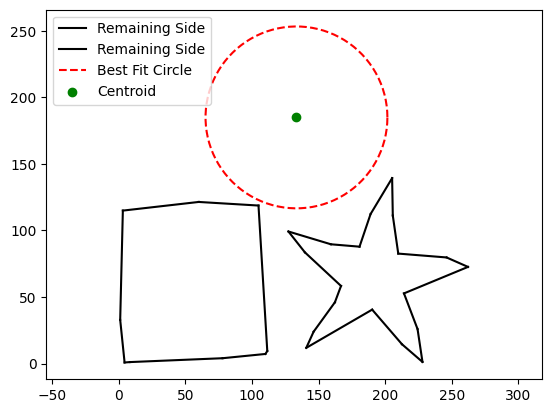

[[(8.3, 1.1),
  (77.9, 4.0),
  (110.1, 7.2),
  (111.5, 9.4),
  (104.9, 118.7),
  (60.0, 121.4),
  (3.0, 114.9),
  (1.0, 32.8),
  (4.3, 0.8),
  (8.3, 1.1)],
 [(140.8, 11.8),
  (190.3, 40.5),
  (212.7, 14.5),
  (228.1, 1.2),
  (224.4, 25.9),
  (214.2, 52.7),
  (262.3, 72.6),
  (246.2, 79.7),
  (209.9, 82.6),
  (205.8, 111.2),
  (205.3, 139.3),
  (189.1, 112.3),
  (180.8, 87.8),
  (159.3, 89.6),
  (127.4, 99.2),
  (139.8, 83.5),
  (166.9, 58.3),
  (162.3, 46.0),
  (146.3, 23.9),
  (140.8, 11.8)]]

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

def mean_square_circle_error(polygon, center, radius):
    total_error = 0
    for point in polygon:
        dist = np.linalg.norm(point - center)
        error = (dist - radius) ** 2
        total_error += error
    mse = total_error / len(polygon)
    return mse

def best_fit_circle(polygon):
    polygon = np.array(polygon)  
    
    centroid = np.mean(polygon, axis=0)  
    distances = np.linalg.norm(polygon - centroid, axis=1)  
    radius = np.mean(distances)  
    mse = mean_square_circle_error(polygon, centroid, radius)  
    
    return centroid, radius, mse

def plot_polygon_and_circle(polygon, centroid, radius, label):
    polygon = np.array(polygon)  # Ensure polygon is a numpy array
    theta = np.linspace(0, 2 * np.pi, 100)
    circle_x = centroid[0] + radius * np.cos(theta)
    circle_y = centroid[1] + radius * np.sin(theta)
    
    # plt.plot(*polygon.T, 'b-', label='Polygon')
    plt.plot(circle_x, circle_y, 'r--', label=label)
    plt.scatter(*centroid, color='green', zorder=5, label='Centroid')

def plot_remaining_sides(unique_cycles, marked_sides):
    for polygon in unique_cycles:
        polygon = np.array(polygon)
        for i in range(len(polygon)):
            side = tuple(sorted([tuple(polygon[i]), tuple(polygon[(i + 1) % len(polygon)])]))
            if side not in marked_sides:
                plt.plot(*np.array([polygon[i], polygon[(i + 1) % len(polygon)]]).T, 'k-', label='Remaining Side' if i == 0 else "")

min_heap = []
possible_circles = []
unused_loops = []

for polygon in unique_cycles:
    centroid, radius, mse = best_fit_circle(polygon)
    heapq.heappush(min_heap, (mse, centroid, radius, polygon))

marked_sides = set()

while min_heap:
    mse, centroid, radius, polygon = heapq.heappop(min_heap)
    
    contains_marked_side = False
    for i in range(len(polygon)):
        side = tuple(sorted([tuple(polygon[i]), tuple(polygon[(i + 1) % len(polygon)])]))
        if side in marked_sides:
            contains_marked_side = True
            break
    
    if contains_marked_side:
        unused_loops.append(polygon)
        continue
    
    if mse < 25:
        print(f'Mean Square Fitting Error: {mse:.4f}')
        possible_circles.append((centroid, radius, polygon))
        # plot_polygon_and_circle(polygon, centroid, radius, label='Best Fit Circle')
        
        for i in range(len(polygon)):
            side = tuple(sorted([tuple(polygon[i]), tuple(polygon[(i + 1) % len(polygon)])]))
            marked_sides.add(side)
    else:
        unused_loops.append(polygon)

for polygon in unique_cycles:
    for i in range(len(polygon)):
        side = tuple(sorted([tuple(polygon[i]), tuple(polygon[(i + 1) % len(polygon)])]))


filtered_unused_loops = []
for loop in unused_loops:
    all_sides_unused = True
    for i in range(len(loop)):
        side = tuple(sorted([tuple(loop[i]), tuple(loop[(i + 1) % len(loop)])]))
        if side in marked_sides:
            all_sides_unused = False
            break
    if all_sides_unused:
        filtered_unused_loops.append(loop)

plt.figure()

plot_remaining_sides(unique_cycles, marked_sides)

for centroid, radius, polygon in possible_circles:
    plot_polygon_and_circle(polygon, centroid, radius, label='Best Fit Circle')

plt.legend()
plt.axis('equal')
plt.show()

filtered_unused_loops

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

def mean_square_regular_polygon_error(polygon, centroid, radius, num_sides):
    total_error = 0
    theta_offset = np.arctan2(polygon[0][1] - centroid[1], polygon[0][0] - centroid[0])
    for point in polygon:
        theta = np.arctan2(point[1] - centroid[1], point[0] - centroid[0]) - theta_offset
        theta = (theta + 2 * np.pi) % (2 * np.pi)  # Normalize angle to [0, 2*pi)
        closest_vertex = np.round(theta / (2 * np.pi / num_sides)) * (2 * np.pi / num_sides)
        closest_point = centroid + radius * np.array([np.cos(closest_vertex + theta_offset), np.sin(closest_vertex + theta_offset)])
        error = np.linalg.norm(point - closest_point) ** 2
        total_error += error
    mse = total_error / len(polygon)
    return mse

def best_fit_regular_polygon(polygon, num_sides):
    polygon = np.array(polygon)
    centroid = np.mean(polygon, axis=0)
    distances = np.linalg.norm(polygon - centroid, axis=1)
    radius = np.mean(distances)
    mse = mean_square_regular_polygon_error(polygon, centroid, radius, num_sides)
    return centroid, radius, mse


def mean_square_circle_error(polygon, center, radius):
    total_error = 0
    for point in polygon:
        dist = np.linalg.norm(point - center)
        error = (dist - radius) ** 2
        total_error += error
    mse = total_error / len(polygon)
    return mse

def best_fit_circle(polygon):
    polygon = np.array(polygon)  
    centroid = np.mean(polygon, axis=0)  
    distances = np.linalg.norm(polygon - centroid, axis=1)  
    radius = np.mean(distances)  
    mse = mean_square_circle_error(polygon, centroid, radius)  
    return centroid, radius, mse

def plot_polygon_and_circle(polygon, centroid, radius, label):
    polygon = np.array(polygon)
    theta = np.linspace(0, 2 * np.pi, 100)
    circle_x = centroid[0] + radius * np.cos(theta)
    circle_y = centroid[1] + radius * np.sin(theta)
    
    plt.plot(circle_x, circle_y, 'r--', label=label)
    plt.scatter(*centroid, color='green', zorder=5, label='Centroid')

def plot_remaining_sides(unique_cycles, marked_sides):
    for polygon in unique_cycles:
        polygon = np.array(polygon)
        for i in range(len(polygon)):
            side = tuple(sorted([tuple(polygon[i]), tuple(polygon[(i + 1) % len(polygon)])]))
            if side not in marked_sides:
                plt.plot(*np.array([polygon[i], polygon[(i + 1) % len(polygon)]]).T, 'k-', label='Remaining Side' if i == 0 else "")



12.675036126219277
Mean Square Fitting Error: 12.6750
240.7866932612729
345.3180267266899


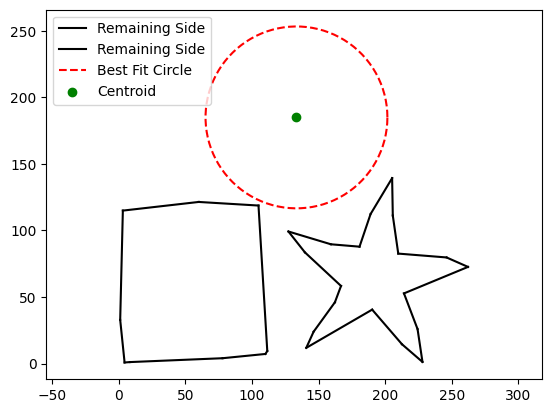

filtered_unused_loops [[(8.3, 1.1), (77.9, 4.0), (110.1, 7.2), (111.5, 9.4), (104.9, 118.7), (60.0, 121.4), (3.0, 114.9), (1.0, 32.8), (4.3, 0.8), (8.3, 1.1)], [(140.8, 11.8), (190.3, 40.5), (212.7, 14.5), (228.1, 1.2), (224.4, 25.9), (214.2, 52.7), (262.3, 72.6), (246.2, 79.7), (209.9, 82.6), (205.8, 111.2), (205.3, 139.3), (189.1, 112.3), (180.8, 87.8), (159.3, 89.6), (127.4, 99.2), (139.8, 83.5), (166.9, 58.3), (162.3, 46.0), (146.3, 23.9), (140.8, 11.8)]]


In [41]:
import heapq
import matplotlib.pyplot as plt

# Assuming `unique_cycles`, `best_fit_circle`, `plot_remaining_sides`, and `plot_polygon_and_circle` are defined

min_heap = []
possible_circles = []
unused_loops = []

# Push all polygons into the heap based on their mean square fitting error
for polygon in unique_cycles:
    centroid, radius, mse = best_fit_circle(polygon)
    heapq.heappush(min_heap, (mse, centroid, radius, polygon))

marked_sides = set()

while min_heap:
    mse, centroid, radius, polygon = heapq.heappop(min_heap)
    
    contains_marked_side = False
    for i in range(len(polygon)):
        side = tuple(sorted([tuple(polygon[i]), tuple(polygon[(i + 1) % len(polygon)])]))
        if side in marked_sides:
            contains_marked_side = True
            break
    
    if contains_marked_side:
        unused_loops.append(polygon)
        continue
    
    print(mse)
    if mse < 50:
        print(f'Mean Square Fitting Error: {mse:.4f}')
        possible_circles.append((centroid, radius, polygon))
        
        for i in range(len(polygon)):
            side = tuple(sorted([tuple(polygon[i]), tuple(polygon[(i + 1) % len(polygon)])]))
            marked_sides.add(side)
    else:
        unused_loops.append(polygon)

filtered_unused_loops = []
for loop in unused_loops:
    all_sides_unused = True
    for i in range(len(loop)):
        side = tuple(sorted([tuple(loop[i]), tuple(loop[(i + 1) % len(loop)])]))
        if side in marked_sides:
            all_sides_unused = False
            break
    if all_sides_unused:
        filtered_unused_loops.append(loop)

# Find remaining sides that are not in circles or unused loops
remaining_sides = set()
all_sides = set()

# Collect all sides from unique_cycles
for polygon in unique_cycles:
    for i in range(len(polygon)):
        side = tuple(sorted([tuple(polygon[i]), tuple(polygon[(i + 1) % len(polygon)])]))
        all_sides.add(side)

# Remove sides in possible_circles
for _, _, polygon in possible_circles:
    for i in range(len(polygon)):
        side = tuple(sorted([tuple(polygon[i]), tuple(polygon[(i + 1) % len(polygon)])]))
        if side in all_sides:
            all_sides.remove(side)

# Remove sides in filtered_unused_loops
for polygon in filtered_unused_loops:
    for i in range(len(polygon)):
        side = tuple(sorted([tuple(polygon[i]), tuple(polygon[(i + 1) % len(polygon)])]))
        if side in all_sides:
            all_sides.remove(side)

remaining_sides = all_sides

# Plot the results
plt.figure()
plot_remaining_sides(unique_cycles, marked_sides)

for centroid, radius, polygon in possible_circles:
    plot_polygon_and_circle(polygon, centroid, radius, label='Best Fit Circle')

plt.legend()
plt.axis('equal')
plt.show()

# Print remaining sides
# print("Remaining sides not in circles and not in filtered unused loops:")
# print(remaining_sides)

print("filtered_unused_loops", filtered_unused_loops)


C:\Users\shubh\AppData\Local\Temp\ipykernel_16900\2145634775.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


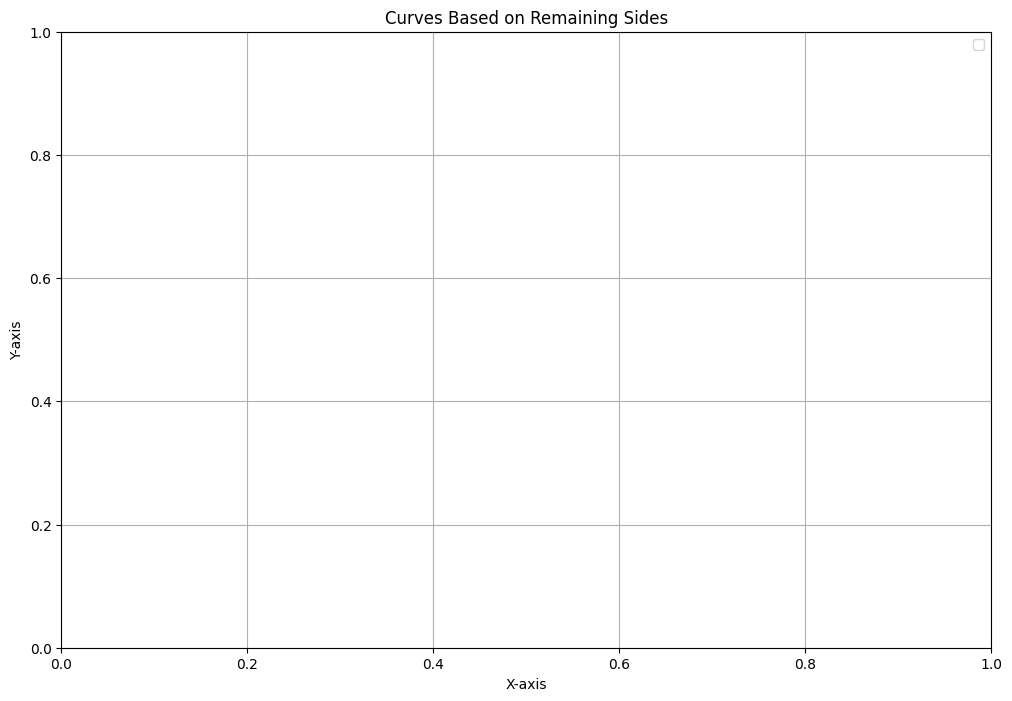

In [42]:
import matplotlib.pyplot as plt

def plot_curves_from_sides(curves, inverse_dict, remaining_sides):
    """Plot curves based on the remaining sides and their corresponding curves."""
    
    plt.figure(figsize=(12, 8))
    
    plotted_curves = set()
    
    for side in remaining_sides:
        if side in inverse_dict:
            curve_num = inverse_dict[side]
            if curve_num not in plotted_curves:
                if curve_num in curves:
                    points = curves[curve_num]
                    x_values, y_values = zip(*points)
                    plt.plot(x_values, y_values, label=f'Curve {curve_num}')
                    plotted_curves.add(curve_num)
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Curves Based on Remaining Sides')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
plot_curves_from_sides(curves, inverse_dict, remaining_sides)


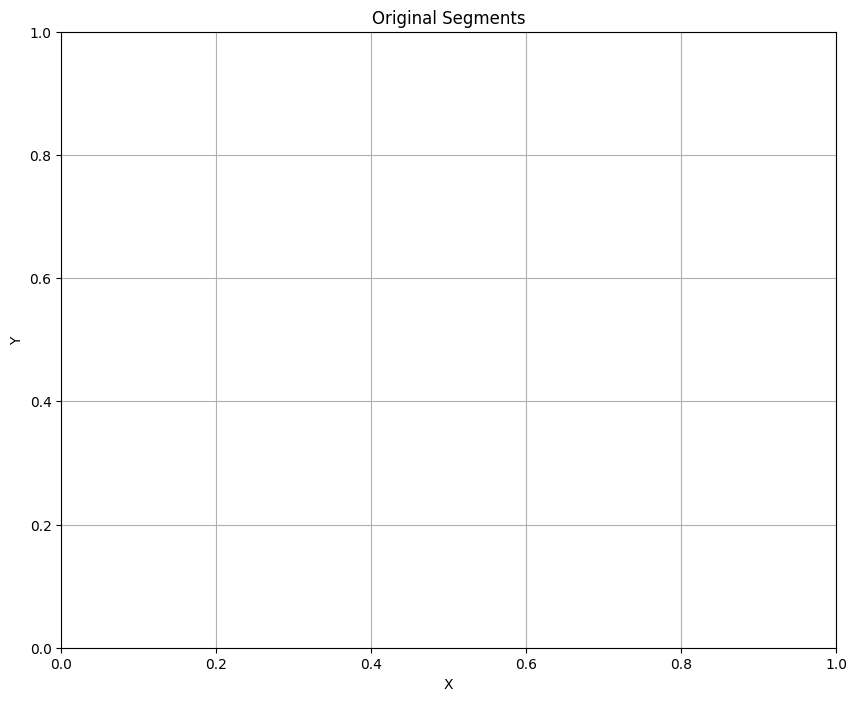

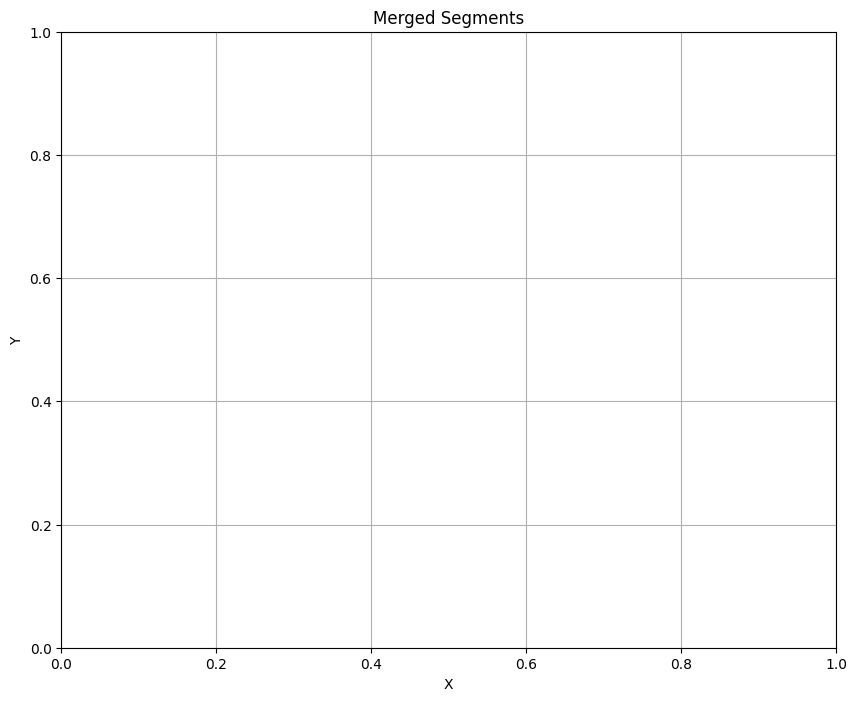

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

# Function to check if three points are collinear
def are_collinear(p1, p2, p3, tol=30):
    return np.abs((p3[1] - p1[1]) * (p2[0] - p1[0]) - (p2[1] - p1[1]) * (p3[0] - p1[0])) < tol

# Function to check if two points are approximately equal
def are_approximately_equal(p1, p2, tol=5):
    return np.linalg.norm(np.array(p1) - np.array(p2)) < tol

# Function to compute the slope of a segment
def compute_slope(p1, p2):
    if p2[0] == p1[0]:
        return np.inf
    return (p2[1] - p1[1]) / (p2[0] - p1[0])

# Function to merge collinear segments
def merge_collinear_segments(segments, tol=1):
    merged_segments = []
    used = set()
    slopes = [compute_slope(start, end) for start, end in segments]

    for i, (start1, end1) in enumerate(segments):
        if i in used:
            continue
        
        collinear_group = [(start1, end1)]
        used.add(i)

        for j, (start2, end2) in enumerate(segments):
            if j in used:
                continue
            
            # Check if the segments have the same slope and a common vertex
            if (np.abs(slopes[i] - slopes[j]) < tol) and (
                are_approximately_equal(start1, start2, tol) or 
                are_approximately_equal(start1, end2, tol) or
                are_approximately_equal(end1, start2, tol) or 
                are_approximately_equal(end1, end2, tol)):
                collinear_group.append((start2, end2))
                used.add(j)

        # Merge all collinear segments in the group
        all_points = np.array([point for segment in collinear_group for point in segment])
        if len(all_points) > 2:
            hull = ConvexHull(all_points)
            hull_points = all_points[hull.vertices]
            min_idx = np.argmin(hull_points[:, 0])
            max_idx = np.argmax(hull_points[:, 0])
            merged_segments.append((tuple(hull_points[min_idx]), tuple(hull_points[max_idx])))
        else:
            merged_segments.append((tuple(all_points[0]), tuple(all_points[1])))

    return merged_segments

# Function to plot segments
def plot_segments(segments, title):
    plt.figure(figsize=(10, 8))
    for (start, end) in segments:
        plt.plot([start[0], end[0]], [start[1], end[1]], marker='o')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

segments = list(non_cycle_lines)

merged_segments = merge_collinear_segments(segments)
merged_segments = merge_collinear_segments(merged_segments)

plot_segments(segments, "Original Segments")

plot_segments(merged_segments, "Merged Segments")


[array([[104.9, 118.7],
       [  3. , 114.9],
       [  4.3,   0.8],
       [110.1,   7.2]]), array([[209.9,  82.6],
       [214.2,  52.7],
       [166.9,  58.3],
       [190.3,  40.5],
       [262.3,  72.6],
       [180.8,  87.8],
       [228.1,   1.2]])] [[((8.3, 1.1), (77.9, 4.0)), ((77.9, 4.0), (110.1, 7.2)), ((110.1, 7.2), (111.5, 9.4)), ((111.5, 9.4), (104.9, 118.7)), ((104.9, 118.7), (60.0, 121.4)), ((60.0, 121.4), (3.0, 114.9)), ((3.0, 114.9), (1.0, 32.8)), ((1.0, 32.8), (4.3, 0.8)), ((4.3, 0.8), (8.3, 1.1))], [((140.8, 11.8), (190.3, 40.5)), ((190.3, 40.5), (212.7, 14.5)), ((212.7, 14.5), (228.1, 1.2)), ((228.1, 1.2), (224.4, 25.9)), ((224.4, 25.9), (214.2, 52.7)), ((214.2, 52.7), (262.3, 72.6)), ((262.3, 72.6), (246.2, 79.7)), ((246.2, 79.7), (209.9, 82.6)), ((209.9, 82.6), (205.8, 111.2)), ((205.8, 111.2), (205.3, 139.3)), ((205.3, 139.3), (189.1, 112.3)), ((189.1, 112.3), (180.8, 87.8)), ((180.8, 87.8), (159.3, 89.6)), ((159.3, 89.6), (127.4, 99.2)), ((127.4, 99.2), (139.8

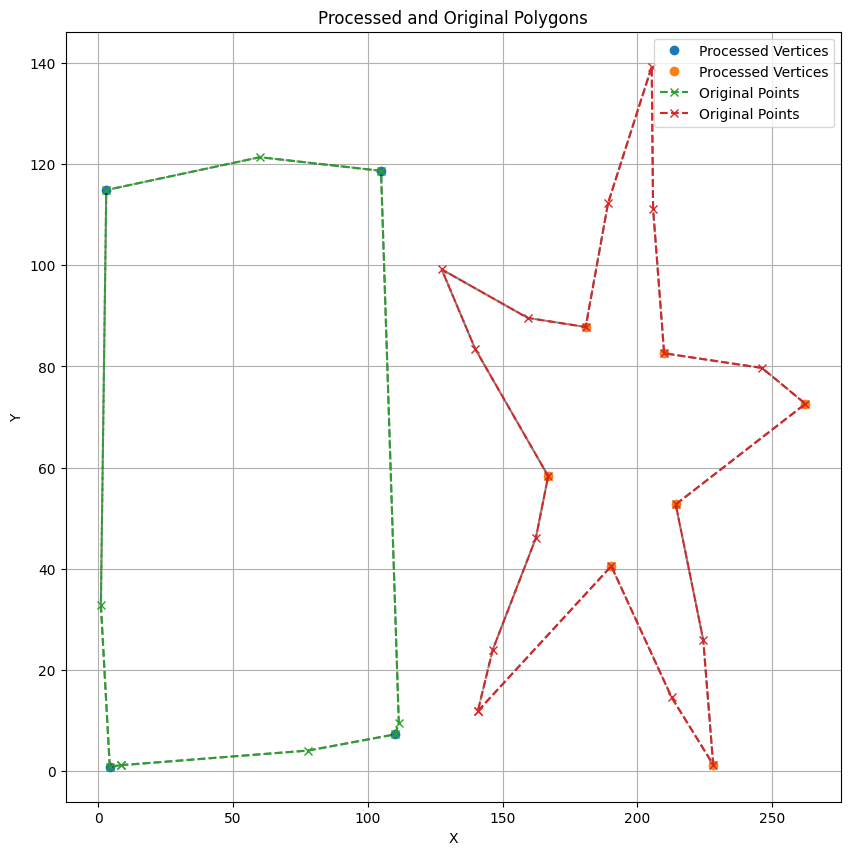

In [44]:
import math
import heapq
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate the angle between two lines
def calculate_angle(line1, line2):
    def vector_from_line(line):
        (x1, y1), (x2, y2) = line
        return (x2 - x1, y2 - y1)

    (x1, y1), (x2, y2) = line1
    (x3, y3), (x4, y4) = line2
    
    common_points = set(line1) & set(line2)
    if len(common_points) == 0:
        return None  

    vec1 = vector_from_line(line1)
    vec2 = vector_from_line(line2)
    
    magnitude1 = math.sqrt(vec1[0]**2 + vec1[1]**2)
    magnitude2 = math.sqrt(vec2[0]**2 + vec2[1]**2)
    
    if magnitude1 == 0 or magnitude2 == 0:
        return None 
    
    dot_product = vec1[0] * vec2[0] + vec1[1] * vec2[1]
    cos_theta = dot_product / (magnitude1 * magnitude2)
    
    cos_theta = min(1, max(-1, cos_theta))
    
    angle = math.degrees(math.acos(cos_theta))
    return angle

def are_points_close(p1, p2, tolerance=5):
    return np.linalg.norm(np.array(p1) - np.array(p2)) < tolerance

def process_polygons(polygons):
    vertices_arr = []
    lines_arr = []

    for points in polygons:
        lines = []
        for i in range(len(points) - 1):
            lines.append((points[i], points[(i + 1) % len(points)]))

        heap = []
        for i in range(len(lines)):
            angle = calculate_angle(lines[i], lines[(i + 1) % len(lines)])
            if angle is not None:
                heapq.heappush(heap, (abs(90 - angle), lines[i], lines[(i + 1) % len(lines)]))

        vertices = set()
        while heap:
            angle_diff, line1, line2 = heapq.heappop(heap)
            if angle_diff < 360 / (len(vertices) + 1):
                common_point = tuple(set(line1) & set(line2))
                if common_point:
                    if not any(are_points_close(common_point, v) for v in vertices):
                        vertices.add(common_point)

        vertices = np.array(list(vertices))
        if vertices.ndim > 2:
            vertices = vertices.reshape(-1, 2)
        
        vertices_arr.append(vertices)
        lines_arr.append(lines)
    
    return vertices_arr, lines_arr

# Example polygons (replace with actual filtered unused polygons)
# filtered_unused_loops = [
#     np.array([[224.6, 215.7], [216.8, 2.1], [1.5, 1.7], [13.2, 227.8]]),
#     # Add more polygons here
# ]

vertices_arr, lines_arr = process_polygons(filtered_unused_loops)
print(vertices_arr, lines_arr)

# Plot the polygons
plt.figure(figsize=(10, 10))
for vertices in vertices_arr:
    if len(vertices) > 0:  # Check if vertices is not empty
        plt.plot(vertices[:, 0], vertices[:, 1], 'o', label='Processed Vertices')

for lines in lines_arr:
    for line in lines:
        x_values, y_values = zip(*line)
        plt.plot(x_values, y_values, 'k--', alpha=0.5)

# Plot the original points for reference
for points in filtered_unused_loops:
    plt.plot([p[0] for p in points], [p[1] for p in points], 'x--',  label='Original Points')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Processed and Original Polygons')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
import numpy as np

def calculate_angle(point, centroid):
    return np.arctan2(point[1] - centroid[1], point[0] - centroid[0])

temp = []
for vertices in vertices_arr:
    centroid = np.mean(vertices, axis=0)
    vertices = np.array(vertices, dtype=float)
    
    angles = [calculate_angle(point, centroid) for point in vertices]
    sorted_vertices = [point for _, point in sorted(zip(angles, vertices), reverse=True)]
    
    temp.append(np.array(sorted_vertices))

vertices_arr = temp

Valid Polygons:
[(array([[  3.57499661,   5.35474388],
       [110.62025612,   8.39999661],
       [107.57500339, 115.44525612],
       [  0.52974388, 112.40000339]]), np.float64(3.9554314190044186), np.float64(75.72305179851175)), (array([[242.4707484 ,  43.06357864],
       [239.83126027,  75.47451781],
       [212.84567371,  93.61877293],
       [181.83468582,  83.83334981],
       [170.15020298,  53.48687166],
       [186.5908791 ,  25.43085547],
       [218.77654972,  20.79205368]]), np.float64(5.915645219572981), np.float64(37.47344759474379))]
Rejected Polygons:
[]
Final Polygons from Remaining Segments:
[]


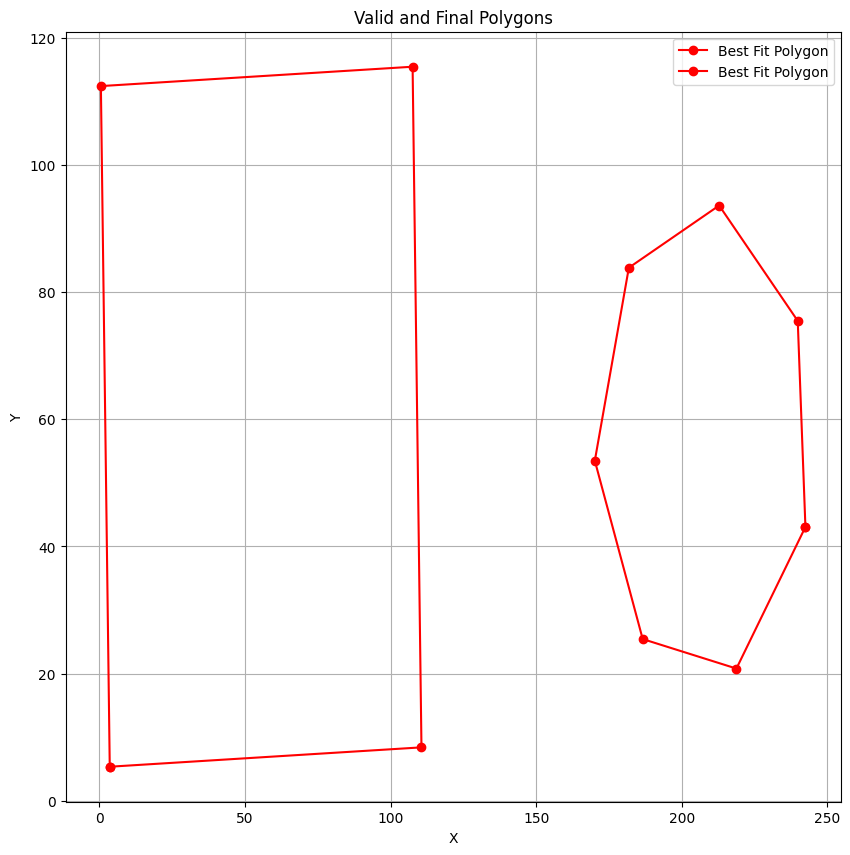

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import heapq

def get_best_fit_polygon(vertices, lines):
    centroid = np.mean(vertices, axis=0)
    distances = np.linalg.norm(vertices - centroid, axis=1)
    average_radius = np.mean(distances)
    n_vertices = len(vertices)

    def generate_regular_polygon(centroid, radius, n_vertices, rotation_angle=0):
        angles = np.linspace(0, 2 * np.pi, n_vertices, endpoint=False) + rotation_angle
        return np.array([
            [centroid[0] + radius * np.cos(angle), centroid[1] + radius * np.sin(angle)]
            for angle in angles
        ])

    def fit_score(vertices, approx_vertices):
        return np.sum(cdist(vertices, approx_vertices, 'euclidean').min(axis=1))

    def line_fit_score(lines, approx_vertices):
        total_distance = 0
        for line in lines:
            line_midpoint = np.mean(line, axis=0)
            distances = np.linalg.norm(approx_vertices - line_midpoint, axis=1)
            total_distance += np.min(distances)
        return total_distance

    best_fit_polygon = None
    best_fit_score = float('inf')
    best_rotation_angle = 0
    best_radius = average_radius

    radii = np.linspace(average_radius - 1, average_radius + 1, 50)
    for radius in radii:
        for angle in np.linspace(0, 2 * np.pi, 360):
            approx_vertices = generate_regular_polygon(centroid, radius, n_vertices, rotation_angle=angle)
            vertex_score = fit_score(vertices, approx_vertices)
            line_score = line_fit_score(lines, approx_vertices)
            score = vertex_score + line_score
            if score < best_fit_score:
                best_fit_score = score
                best_fit_polygon = approx_vertices
                best_rotation_angle = angle
                best_radius = radius

    return best_fit_polygon, best_rotation_angle, best_radius

def process_polygons(vertices_list, lines_list, error_threshold=150):
    valid_polygons = []
    rejected_polygons = []
    remaining_segments = []

    for vertices, lines in zip(vertices_list, lines_list):
        best_fit_polygon, best_rotation_angle, best_radius = get_best_fit_polygon(vertices, lines)

        line_errors = []
        for line in lines:
            line_midpoint = np.mean(line, axis=0)
            distances = np.linalg.norm(best_fit_polygon - line_midpoint, axis=1)
            line_errors.append(np.min(distances))
        
        if any(error > error_threshold for error in line_errors):
            rejected_polygons.append((vertices, lines))
            for line in lines:
                remaining_segments.append(line)
            continue
        
        valid_polygons.append((best_fit_polygon, best_rotation_angle, best_radius))

    return valid_polygons, rejected_polygons, remaining_segments

def handle_remaining_segments(remaining_segments, error_threshold=150):
    heapq.heapify(remaining_segments)
    final_polygons = []
    utilized_segments = set()

    while remaining_segments:
        current_segment = heapq.heappop(remaining_segments)
        if any(tuple(segment) in utilized_segments for segment in current_segment):
            continue

        remaining_polygons = [segment for segment in current_segment if tuple(segment) not in utilized_segments]

        if len(remaining_polygons) == 0:
            continue

        vertices = np.array([point for segment in remaining_polygons for point in segment])
        lines = remaining_polygons
        best_fit_polygon, best_rotation_angle, best_radius = get_best_fit_polygon(vertices, lines)

        line_errors = []
        for line in lines:
            line_midpoint = np.mean(line, axis=0)
            distances = np.linalg.norm(best_fit_polygon - line_midpoint, axis=1)
            line_errors.append(np.min(distances))

        if any(error > error_threshold for error in line_errors):
            for line in lines:
                remaining_segments.append(line)
            continue

        final_polygons.append((best_fit_polygon, best_rotation_angle, best_radius))
        for segment in lines:
            utilized_segments.add(tuple(segment))

    return final_polygons

valid_polygons, rejected_polygons, remaining_segments = process_polygons(vertices_arr, lines_arr)
final_polygons = handle_remaining_segments(remaining_segments)

print("Valid Polygons:")
print(valid_polygons)

print("Rejected Polygons:")
print(rejected_polygons)

print("Final Polygons from Remaining Segments:")
print(final_polygons)

plt.figure(figsize=(10, 10))
for best_fit_polygon, best_rotation_angle, best_radius in valid_polygons:
    plt.plot(np.append(best_fit_polygon[:, 0], best_fit_polygon[0, 0]), 
             np.append(best_fit_polygon[:, 1], best_fit_polygon[0, 1]), 'ro-', label='Best Fit Polygon')

for best_fit_polygon, best_rotation_angle, best_radius in final_polygons:
    plt.plot(np.append(best_fit_polygon[:, 0], best_fit_polygon[0, 0]), 
             np.append(best_fit_polygon[:, 1], best_fit_polygon[0, 1]), 'go-', label='Final Polygon')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Valid and Final Polygons')
plt.grid(True)
plt.show()


[(array([[  3.57499661,   5.35474388],
       [110.62025612,   8.39999661],
       [107.57500339, 115.44525612],
       [  0.52974388, 112.40000339]]), np.float64(3.9554314190044186), np.float64(75.72305179851175)), (array([[242.4707484 ,  43.06357864],
       [239.83126027,  75.47451781],
       [212.84567371,  93.61877293],
       [181.83468582,  83.83334981],
       [170.15020298,  53.48687166],
       [186.5908791 ,  25.43085547],
       [218.77654972,  20.79205368]]), np.float64(5.915645219572981), np.float64(37.47344759474379))]
[(array([133.42916667, 184.92083333]), np.float64(68.31784427086546), [(109.1, 125.5), (151.8, 122.6), (166.7, 126.4), (180.5, 134.0), (193.9, 146.7), (203.9, 163.2), (209.7, 182.1), (209.3, 197.8), (201.8, 214.0), (188.0, 229.2), (169.4, 241.5), (148.0, 249.9), (130.9, 252.0), (114.4, 249.3), (98.7, 241.7), (84.4, 229.7), (74.5, 216.9), (68.6, 203.3), (66.6, 188.3), (68.5, 172.0), (74.8, 154.7), (84.0, 140.9), (95.7, 130.9), (109.1, 125.5)])]
[]
set()
[]

C:\Users\shubh\AppData\Local\Temp\ipykernel_16900\203840029.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


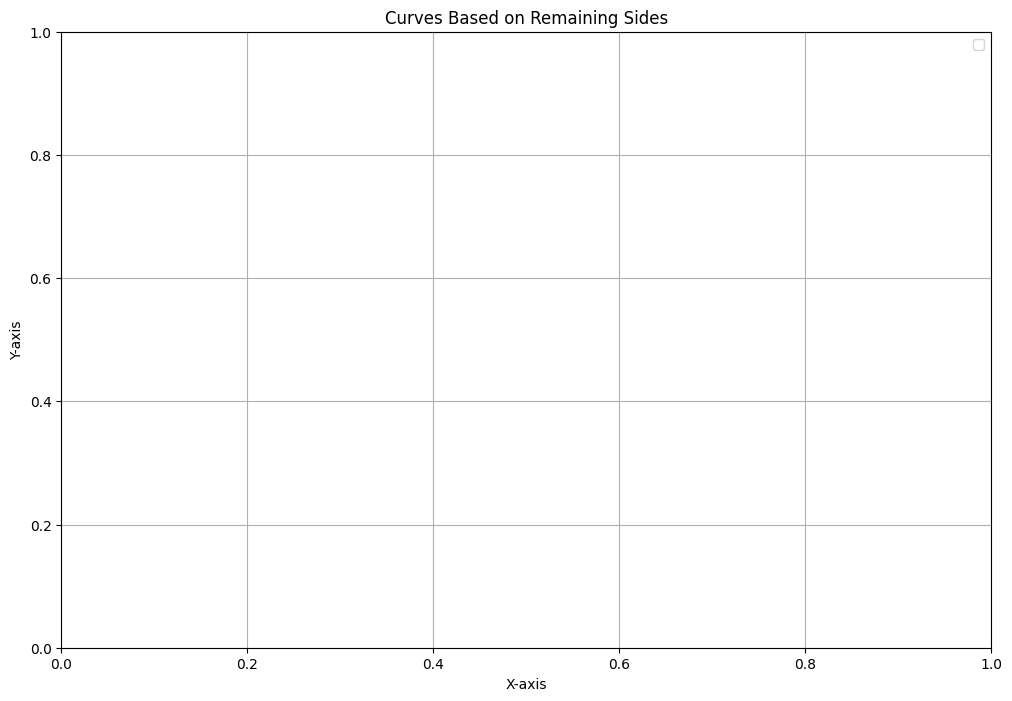

In [47]:
print(valid_polygons)
print(possible_circles)
print(rejected_polygons)
print(remaining_sides)
print(merged_segments)


import matplotlib.pyplot as plt

def plot_curves_from_sides(curves, inverse_dict, remaining_sides):
    """Plot curves based on the remaining sides and their corresponding curves."""
    
    plt.figure(figsize=(12, 8))
    
    plotted_curves = set()
    
    for side in remaining_sides:
        if side in inverse_dict:
            curve_num = inverse_dict[side]
            if curve_num not in plotted_curves:
                if curve_num in curves:
                    points = curves[curve_num]
                    x_values, y_values = zip(*points)
                    plt.plot(x_values, y_values, label=f'Curve {curve_num}')
                    plotted_curves.add(curve_num)
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Curves Based on Remaining Sides')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
plot_curves_from_sides(curves, inverse_dict, remaining_sides)


C:\Users\shubh\AppData\Local\Temp\ipykernel_16900\1879070309.py:48: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.axis((500, 500 ,500, 500))
C:\Users\shubh\AppData\Local\Temp\ipykernel_16900\1879070309.py:48: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.axis((500, 500 ,500, 500))


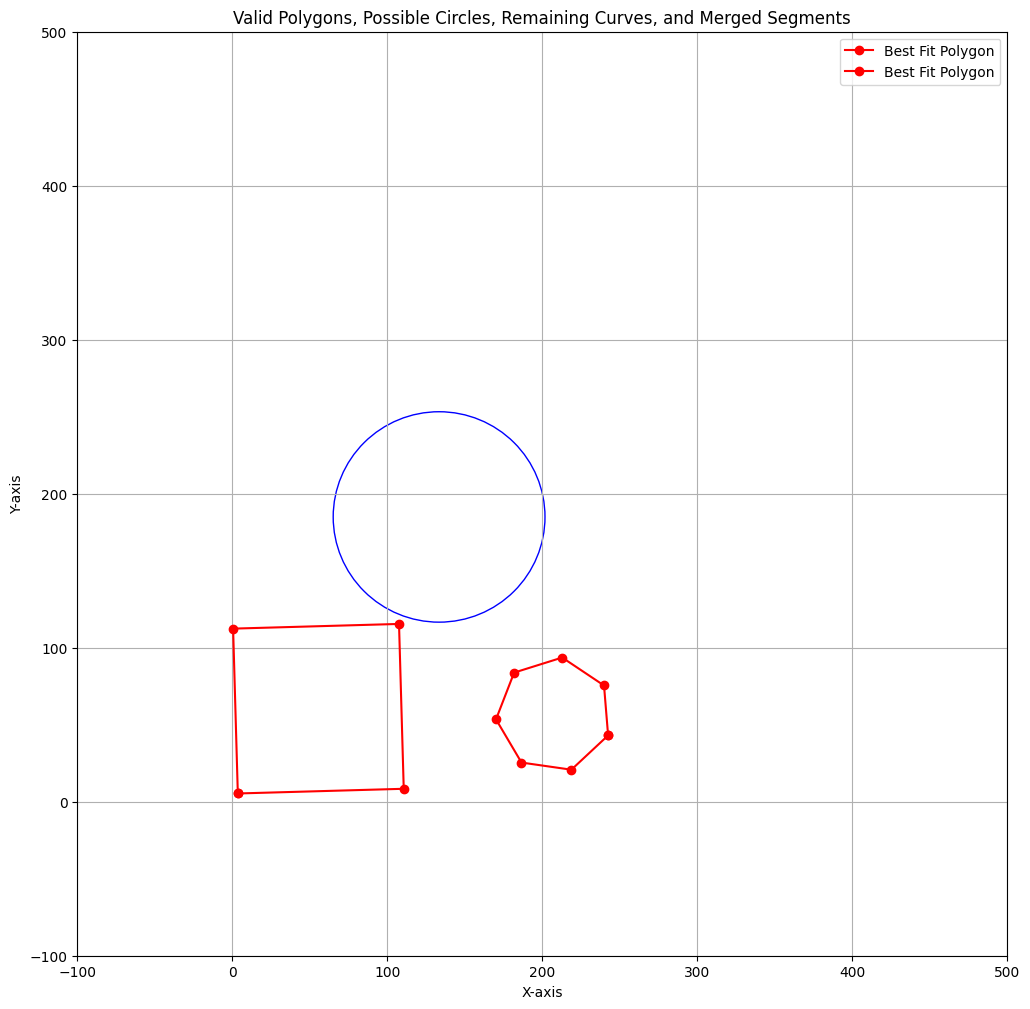

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def plot_all(valid_polygons, possible_circles, remaining_sides, curves, inverse_dict, merged_segments):
    plt.figure(figsize=(12, 12))

    # To collect all points for setting axis limits
    all_x = []
    all_y = []

    for best_fit_polygon, best_rotation_angle, best_radius in valid_polygons:
        all_x.extend(best_fit_polygon[:, 0])
        all_y.extend(best_fit_polygon[:, 1])
        plt.plot(np.append(best_fit_polygon[:, 0], best_fit_polygon[0, 0]), 
                 np.append(best_fit_polygon[:, 1], best_fit_polygon[0, 1]), 'ro-', label='Best Fit Polygon')

    for center, radius, circle_points in possible_circles:
        circle = plt.Circle(center, radius, color='b', fill=False)
        plt.gca().add_artist(circle)
        all_x.append(center[0] + radius)
        all_x.append(center[0] - radius)
        all_y.append(center[1] + radius)
        all_y.append(center[1] - radius)
        circle_points = np.array(circle_points)
        all_x.extend(circle_points[:, 0])
        all_y.extend(circle_points[:, 1])

    plotted_curves = set()
    for side in remaining_sides:
        if side in inverse_dict:
            curve_num = inverse_dict[side]
            if curve_num not in plotted_curves:
                if curve_num in curves:
                    points = curves[curve_num]
                    x_values, y_values = zip(*points)
                    all_x.extend(x_values)
                    all_y.extend(y_values)
                    plt.plot(x_values, y_values, label=f'Curve {curve_num}')
                    plotted_curves.add(curve_num)

    for segment in merged_segments:
        (x1, y1), (x2, y2) = segment
        all_x.extend([x1, x2])
        all_y.extend([y1, y2])
        plt.plot([x1, x2], [y1, y2], 'g-', label='Merged Segment')

    
    plt.axis((500, 500 ,500, 500))

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Valid Polygons, Possible Circles, Remaining Curves, and Merged Segments')
    plt.legend()
    plt.grid(True)
    # plt.axis('equal')  # Ensures the aspect ratio is equal to avoid distortion
    plt.xlim(-100, 500)
    plt.ylim(-100, 500)
    plt.show()


plot_all(valid_polygons, possible_circles, remaining_sides, curves, inverse_dict, merged_segments)
